## Time Series Anomaly Detection for IoT Sensors



## 1. Synthetic IoT Sensor Data Generation

In real-world IoT systems, sensor data often follows regular patterns with occasional anomalies due to faults, wear, or environmental changes.  
To simulate such behavior, synthetic time series data is generated with injected anomalies.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Setting random seed for reproducibility
np.random.seed(42)

# Creating the time index
time_steps = 1000
time = np.arange(time_steps)
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Generate normal sensor signal (sinusoidal + noise)

In [3]:

signal = np.sin(0.02 * time) + np.random.normal(0, 0.2, time_steps)

signal

array([ 0.09934283, -0.00765419,  0.16952704,  0.36456998,  0.03308402,
        0.05300603,  0.43555477,  0.29303006,  0.06542333,  0.28754158,
        0.10598579,  0.12508367,  0.28609508, -0.1255755 , -0.06862792,
        0.1830627 ,  0.11200034,  0.39633656,  0.17066942,  0.08845973,
        0.6825481 ,  0.36260519,  0.43944511,  0.15899847,  0.35290263,
        0.50161006,  0.26668142,  0.5892756 ,  0.41105846,  0.48968519,
        0.44430115,  0.9514908 ,  0.594496  ,  0.40157467,  0.79330201,
        0.40004896,  0.70115739,  0.28235389,  0.42328424,  0.74265167,
        0.86504941,  0.76541949,  0.72151346,  0.69762182,  0.47503448,
        0.63935807,  0.70347387,  1.01898255,  0.88791523,  0.47788934,
        0.90628778,  0.77509157,  0.72701983,  0.99469074,  1.08815771,
        1.07746338,  0.73225694,  0.84679102,  0.9830558 ,  1.11971504,
        0.83620424,  0.90196756,  0.724517  ,  0.71284902,  1.12052102,
        1.23480619,  0.95431308,  1.17419112,  1.05019181,  0.85

In [4]:

# Create DataFrame
data = pd.DataFrame({
    "time": time,
    "sensor_value": signal
})

data.head()

,time,sensor_value
0,0,0.099343
1,1,-0.007654
2,2,0.169527
3,3,0.364570
4,4,0.033084


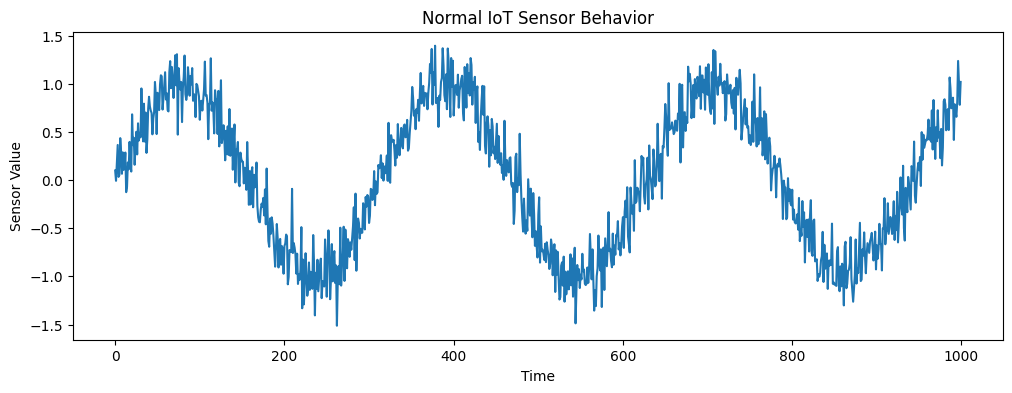

In [5]:
plt.figure(figsize=(12,4))
plt.plot(data["time"], data["sensor_value"])
plt.title("Normal IoT Sensor Behavior")
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.show()


In [6]:
# Copy original signal
anomalous_signal = signal.copy()

# Inject spike anomalies
spike_indices = np.random.choice(range(200, 800), size=10, replace=False)
anomalous_signal[spike_indices] += np.random.normal(3, 0.5, size=10)

# Inject drop anomalies
drop_indices = np.random.choice(range(200, 800), size=10, replace=False)
anomalous_signal[drop_indices] -= np.random.normal(3, 0.5, size=10)
print(anomalous_signal)
# Inject gradual drift
anomalous_signal[700:850] += np.linspace(0, 4, 150)

# Update DataFrame
data["sensor_value"] = anomalous_signal
print(spike_indices)
print(drop_indices)
anomalous_signal


[ 9.93428306e-02 -7.65419354e-03  1.69527042e-01  3.64569978e-01
  3.30840190e-02  5.30060253e-02  4.35554770e-01  2.93030060e-01
  6.54233294e-02  2.87541582e-01  1.05985792e-01  1.25083672e-01
  2.86095081e-01 -1.25575497e-01 -6.86279179e-02  1.83062701e-01
  1.12000337e-01  3.96336559e-01  1.70669418e-01  8.84597291e-02
  6.82548096e-01  3.62605193e-01  4.39445106e-01  1.58998470e-01
  3.52902631e-01  5.01610057e-01  2.66681422e-01  5.89275595e-01
  4.11058460e-01  4.89685187e-01  4.44301151e-01  9.51490797e-01
  5.94495996e-01  4.01574666e-01  7.93302006e-01  4.00048957e-01
  7.01157391e-01  2.82353887e-01  4.23284235e-01  7.42651666e-01
  8.65049407e-01  7.65419486e-01  7.21513463e-01  6.97621824e-01
  4.75034481e-01  6.39358068e-01  7.03473866e-01  1.01898255e+00
  8.87915226e-01  4.77889339e-01  9.06287779e-01  7.75091566e-01
  7.27019827e-01  9.94690740e-01  1.08815771e+00  1.07746338e+00
  7.32256938e-01  8.46791021e-01  9.83055795e-01  1.11971504e+00
  8.36204238e-01  9.01967

array([ 9.93428306e-02, -7.65419354e-03,  1.69527042e-01,  3.64569978e-01,
        3.30840190e-02,  5.30060253e-02,  4.35554770e-01,  2.93030060e-01,
        6.54233294e-02,  2.87541582e-01,  1.05985792e-01,  1.25083672e-01,
        2.86095081e-01, -1.25575497e-01, -6.86279179e-02,  1.83062701e-01,
        1.12000337e-01,  3.96336559e-01,  1.70669418e-01,  8.84597291e-02,
        6.82548096e-01,  3.62605193e-01,  4.39445106e-01,  1.58998470e-01,
        3.52902631e-01,  5.01610057e-01,  2.66681422e-01,  5.89275595e-01,
        4.11058460e-01,  4.89685187e-01,  4.44301151e-01,  9.51490797e-01,
        5.94495996e-01,  4.01574666e-01,  7.93302006e-01,  4.00048957e-01,
        7.01157391e-01,  2.82353887e-01,  4.23284235e-01,  7.42651666e-01,
        8.65049407e-01,  7.65419486e-01,  7.21513463e-01,  6.97621824e-01,
        4.75034481e-01,  6.39358068e-01,  7.03473866e-01,  1.01898255e+00,
        8.87915226e-01,  4.77889339e-01,  9.06287779e-01,  7.75091566e-01,
        7.27019827e-01,  

### Visualizing anomalies


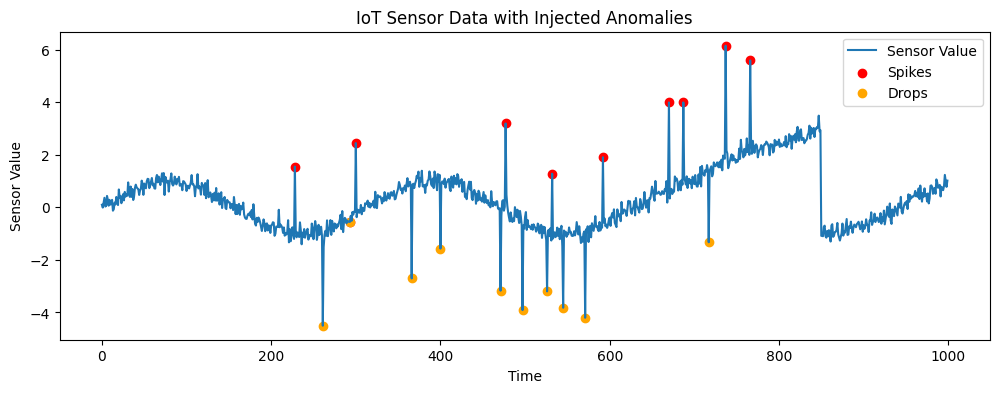

In [7]:
plt.figure(figsize=(12,4))
plt.plot(data["time"], data["sensor_value"], label="Sensor Value")
plt.scatter(spike_indices, data.loc[spike_indices, "sensor_value"], color='red', label="Spikes")
plt.scatter(drop_indices, data.loc[drop_indices, "sensor_value"], color='orange', label="Drops")
plt.legend()
plt.title("IoT Sensor Data with Injected Anomalies")
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.show()


The gradual upward shift between time steps 700–850 represents sensor drift caused by equipment degradation.
The sharp drop observed after this period corresponds to a regime change, such as recalibration or maintenance, and is treated as an abrupt anomaly.

Difference between Spike, Drop, and Drift (Very Important)

🔴 Spike

- What it looks like: Sudden sharp upward jump at a single point

- Duration: 1–2 timestamps

- Meaning: Temporary sensor glitch or shock

📈 Example: Voltage spike 

… 0.4 → 3.8 → 0.5 …

🟠 Drop

- What it looks like: Sudden sharp downward jump

- Duration: 1–2 timestamps

- Meaning: Power loss or communication issue

📉 Example: Sensor glitch

… 0.3 → -3.5 → 0.4 …

🔵 Drift (IMPORTANT)

- What it looks like: Slow, continuous change over time

- Duration: Many timestamps

- Meaning: Equipment wear, calibration shift

📈 Example: Slow increase in temperature due to cooling failure

0.5 → 0.7 → 1.0 → 1.4 → 2.0 → 2.8


So drift is:
- ❌ NOT sudden
- ❌ NOT one point
- ✅ gradual and sustained

A model trained only on spikes is a demo.
A model tested on multiple anomaly types is a production system.

Including point, contextual, change-point, and abrupt anomalies ensures that the model is exposed to realistic failure modes seen in production systems. This improves robustness, reduces false positives, and enables early detection of both sudden and gradual failures.”

### Observations
- The sensor data mostly follows a regular sinusoidal pattern.
- Sudden spikes and drops represent abrupt sensor faults.
- A gradual drift is observed, simulating equipment degradation over time.


### STAGE 2 — Handle Missing Values & Outliers

### Intentionally create missing values

In [8]:
# Introduce missing values artificially
missing_indices = np.random.choice(data.index, size=20, replace=False)
data.loc[missing_indices, "sensor_value"] = np.nan

data.isnull().sum()


time             0
sensor_value    20
dtype: int64

### Visualize missing values impact

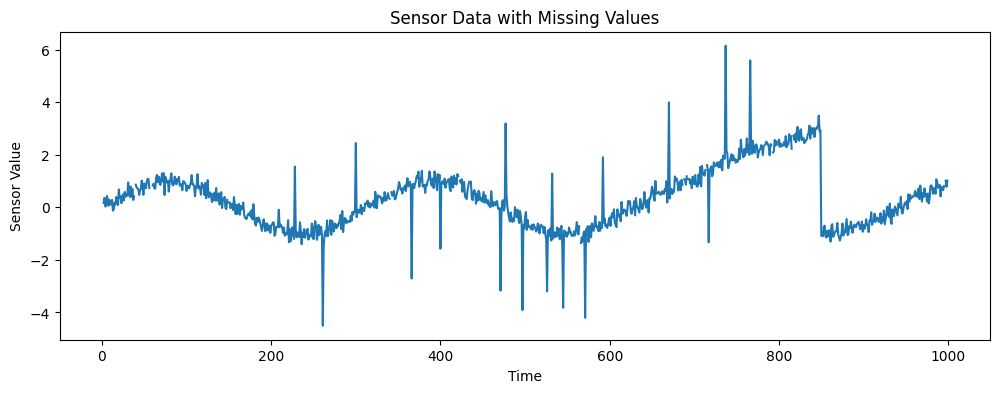

In [9]:
plt.figure(figsize=(12,4))
plt.plot(data["time"], data["sensor_value"])
plt.title("Sensor Data with Missing Values")
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.show()


### Handle missing values

In [10]:
# Handle missing values using forward fill[fills last value(recent last) means before timeframe value]
data["sensor_value"] = data["sensor_value"].fillna(method="ffill")

data.isnull().sum()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_38772\2192342675.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["sensor_value"] = data["sensor_value"].fillna(method="ffill")


time            0
sensor_value    0
dtype: int64

In [11]:
data[data["sensor_value"].isna()]


,time,sensor_value


In [12]:
#  Handling 1 top missing values using backward fill [filling future means next timeframe value]
data["sensor_value"] = data["sensor_value"].fillna(method="bfill")
data.isnull().sum()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_38772\1597889812.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["sensor_value"] = data["sensor_value"].fillna(method="bfill")


time            0
sensor_value    0
dtype: int64

### Can i use Forward fill in real time systems
forward fill can be used in real-time systems because it only uses past values. However, it should be limited to short gaps, applied mainly to slowly varying signals, and ideally combined with a missing-value indicator to avoid masking sensor failures.

### Backward fill
“This uses backward fill, which replaces missing values using the next available observation. It’s useful for offline preprocessing but must be avoided in real-time or forecasting scenarios to prevent data leakage

### Missing Value Handling
Missing values were introduced to simulate sensor communication failures.
Forward-fill imputation was applied, as sensor readings usually change gradually and the previous value provides a reasonable estimate.


### STAGE 3 — Feature Engineering for Time Series

### Create Rolling Features

In [13]:
# Rolling window features
window_size = 20

data["rolling_mean"] = data["sensor_value"].rolling(window=window_size).mean()
data["rolling_std"] = data["sensor_value"].rolling(window=window_size).std()

# Difference feature (rate of change)
data["diff"] = data["sensor_value"].diff()

data.head(50)


,time,sensor_value,rolling_mean,rolling_std,diff
0,0,0.099343,NaN,NaN,NaN
1,1,0.099343,NaN,NaN,0.000000
2,2,0.169527,NaN,NaN,0.070184
3,3,0.364570,NaN,NaN,0.195043
4,4,0.033084,NaN,NaN,-0.331486
5,5,0.053006,NaN,NaN,0.019922
6,6,0.435555,NaN,NaN,0.382549
7,7,0.293030,NaN,NaN,-0.142525
8,8,0.065423,NaN,NaN,-0.227607
9,9,0.287542,NaN,NaN,0.222118


### Handle NaNs created by rolling

In [14]:
data = data.dropna()
data.isnull().sum()


time            0
sensor_value    0
rolling_mean    0
rolling_std     0
diff            0
dtype: int64

### Visualize engineered features

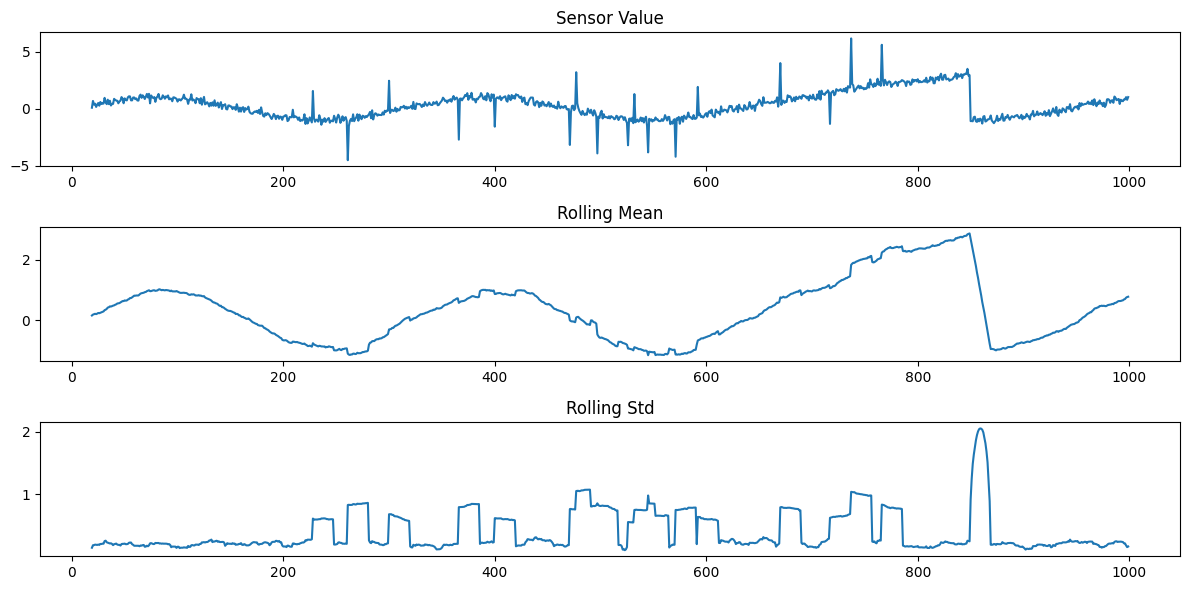

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
plt.plot(data["sensor_value"])
plt.title("Sensor Value")

plt.subplot(3,1,2)
plt.plot(data["rolling_mean"])
plt.title("Rolling Mean")

plt.subplot(3,1,3)
plt.plot(data["rolling_std"])
plt.title("Rolling Std")

plt.tight_layout()
plt.show()


### Feature Engineering Rationale
Rolling mean and rolling standard deviation capture local trends and variability in the sensor signal.
Sudden spikes and drops significantly affect rolling statistics, making them effective for anomaly detection.
The difference feature captures abrupt changes between consecutive time steps.


### STAGE 4 — Anomaly Detection (Approach 1: Isolation Forest)

#### Why Isolation Forest?

“Isolation Forest works by isolating rare observations using random splits.
Anomalies are easier to isolate than normal points, making it effective for high-dimensional and unlabeled data.”

### Prepare feature matrix

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [17]:
features = data[["sensor_value", "rolling_mean", "rolling_std", "diff"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [18]:
scaled_features

array([[-0.21664016, -0.1668895 , -0.80227686, -0.13026049],
       [ 0.30761356, -0.13809876, -0.67882009,  0.9301713 ],
       [ 0.02527971, -0.12510245, -0.67052088, -0.50302492],
       ...,
       [ 0.60098668,  0.41202145, -0.68688849,  0.31785112],
       [ 0.39507517,  0.43405221, -0.77078094, -0.36723283],
       [ 0.60462004,  0.44391733, -0.74135965,  0.37097655]])

### Train Isolation Forest

In [19]:
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

data["anomaly_iforest"] = iso_forest.fit_predict(scaled_features)


In [20]:
data["anomaly_iforest"]

19     1
20     1
21     1
22     1
23     1
      ..
995    1
996    1
997    1
998    1
999    1
Name: anomaly_iforest, Length: 981, dtype: int64

### Visualize detected anomalies

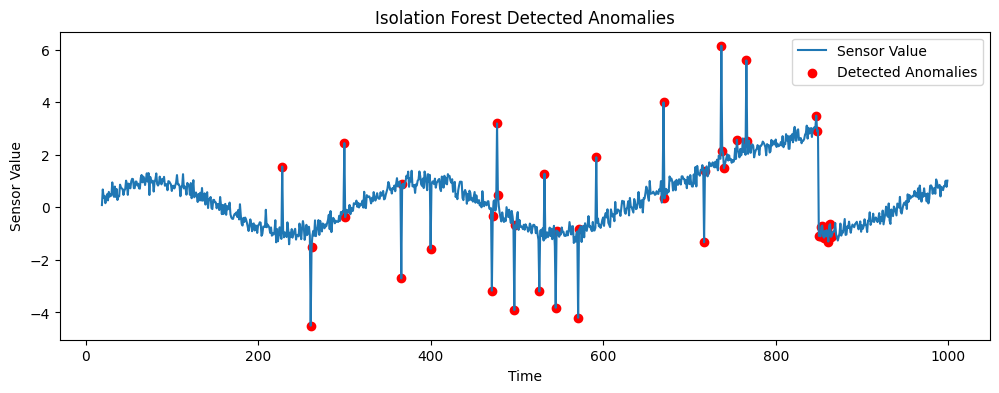

In [21]:
plt.figure(figsize=(12,4))
plt.plot(data["sensor_value"], label="Sensor Value")

anomalies = data[data["anomaly_iforest"] == -1]
plt.scatter(anomalies.index, anomalies["sensor_value"], 
            color='red', label="Detected Anomalies")

plt.legend()
plt.title("Isolation Forest Detected Anomalies")
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.show()


### Isolation Forest Approach
Isolation Forest was used as an unsupervised anomaly detection method.
It identifies anomalies by isolating observations that differ significantly from the majority.
The contamination parameter was set to 5% based on the expected proportion of anomalies in sensor data.


#### Why Isolation Forest detects anomalies partially


Isolation Forest detects points that are rare in feature space, not necessarily all visually obvious anomalies.

So:

✔ What it detects well

- Sharp spikes

- Sudden drops

- Extreme deviations

⚠ What it may miss or partially detect

Gradual drift (because drift points are not rare individually)

Points that look abnormal visually but are statistically common after scaling

This is expected behavior, not a mistake.

Isolation Forest was effective in detecting point anomalies such as spikes and drops, but showed limitations in consistently identifying gradual drift patterns

In [22]:
data["deviation"] = data["sensor_value"] - data["rolling_mean"]


In [23]:
features = data[["sensor_value", "rolling_mean", "rolling_std", "diff", "deviation"]]

scaled_features = scaler.fit_transform(features)

data["anomaly_iforest"] = iso_forest.fit_predict(scaled_features)


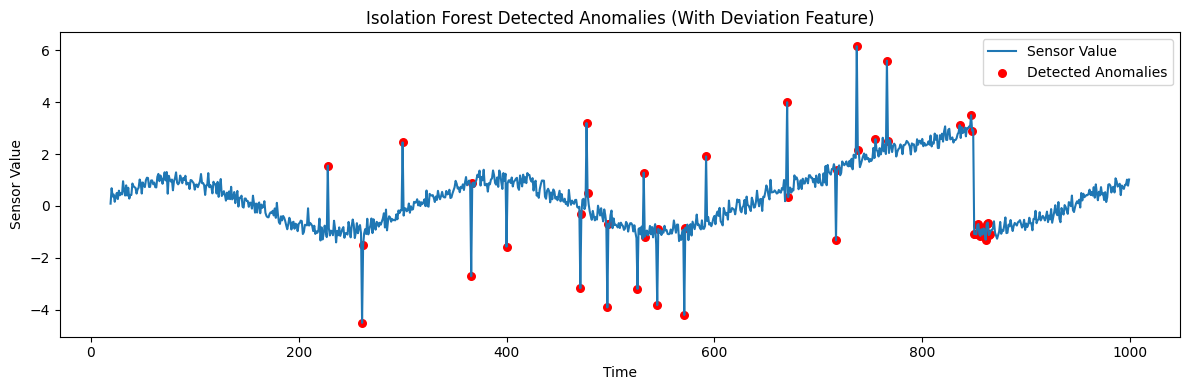

In [24]:
plt.figure(figsize=(12, 4))

# Plot sensor signal
plt.plot(data.index, data["sensor_value"], label="Sensor Value")

# Extract detected anomalies
anomalies = data[data["anomaly_iforest"] == -1]

# Plot anomalies
plt.scatter(
    anomalies.index,
    anomalies["sensor_value"],
    color="red",
    label="Detected Anomalies",
    s=30
)

plt.title("Isolation Forest Detected Anomalies (With Deviation Feature)")
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.legend()
plt.tight_layout()
plt.show()

### Isolation Forest effectively detected abrupt anomalies such as spikes and drops.
However, gradual drift patterns were only partially detected, as individual drift points are not rare in isolation.
This limitation motivated the use of a deep learning–based reconstruction approach in the next stage.


### STAGE 5 — Deep Learning Approach (Autoencoder)

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [26]:
X = scaled_features  # reuse scaled features

In [27]:
input_dim = X.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation="relu")(input_layer)
encoded = Dense(4, activation="relu")(encoded)

decoded = Dense(8, activation="relu")(encoded)
output_layer = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

autoencoder.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse"
)


### Train the model

In [28]:
history = autoencoder.fit(
    X, X,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.0173 - val_loss: 0.2057
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0006 - val_loss: 0.1952
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1015 - val_loss: 0.1824
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9425 - val_loss: 0.1698
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8931 - val_loss: 0.1587
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9431 - val_loss: 0.1427
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7663 - val_loss: 0.1396
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9181 - val_loss: 0.1393
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9680 - val_loss: 0.1380
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6881 - val_loss: 0.1345
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7573 - val_loss: 0.1251
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7799 - val_l

### Compute reconstruction error

In [29]:
reconstructions = autoencoder.predict(X)
reconstruction_error = np.mean(np.square(X - reconstructions), axis=1)

data["reconstruction_error"] = reconstruction_error


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


### Set anomaly threshold

In [30]:
threshold = np.percentile(reconstruction_error, 95)
data["anomaly_autoencoder"] = reconstruction_error > threshold



### Visualize Autoencoder anomalies

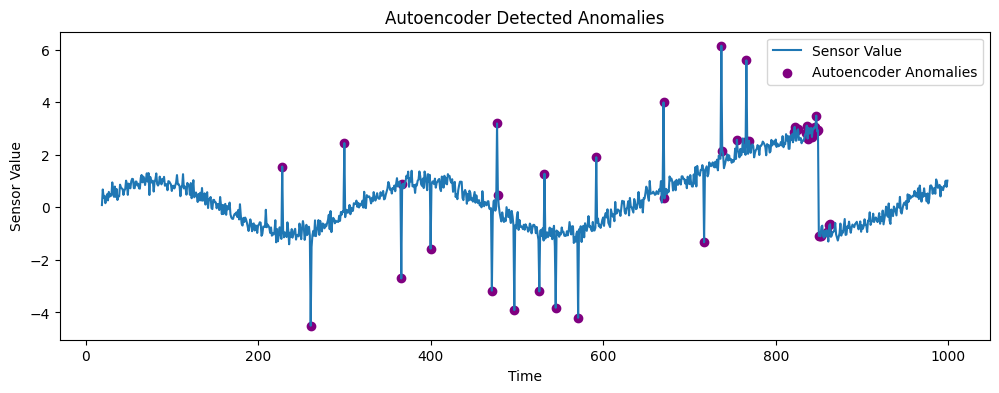

In [31]:
plt.figure(figsize=(12,4))
plt.plot(data["sensor_value"], label="Sensor Value")

ae_anomalies = data[data["anomaly_autoencoder"]]
plt.scatter(ae_anomalies.index, ae_anomalies["sensor_value"],
            color="purple", label="Autoencoder Anomalies")

plt.legend()
plt.title("Autoencoder Detected Anomalies")
plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.show()


### Autoencoder-Based Anomaly Detection
A neural network autoencoder was trained to reconstruct normal sensor patterns.
Anomalies were identified based on high reconstruction error, as abnormal behavior cannot be reconstructed accurately.
This approach is effective for detecting gradual drift and contextual anomalies.


The autoencoder detects gradual drift and contextual anomalies more effectively than Isolation Forest, although it still produces some false positives and does not perfectly capture all anomalous regions.

### Model Comparison
Isolation Forest was effective in detecting point anomalies such as spikes and drops but struggled with gradual drift.
The autoencoder-based approach better captured contextual anomalies and drift by learning normal reconstruction patterns.
However, the autoencoder introduced some false positives, highlighting a trade-off between sensitivity and precision.


## Model Evaluation and Validation

Since the dataset does not contain ground-truth labels for anomalies, traditional supervised metrics such as accuracy are not directly applicable.

### Evaluation Approach
The models were evaluated using a combination of:
- Visual inspection of detected anomalies
- Domain-based reasoning
- Consistency across multiple detection methods

### Isolation Forest Evaluation
Isolation Forest effectively detected point anomalies such as sudden spikes and drops in sensor readings.
These detections aligned well with visually obvious abnormal points.
However, gradual drift patterns were only partially detected, as individual drift points are not rare when considered independently.

### Autoencoder Evaluation
The autoencoder was evaluated using reconstruction error.
A threshold was defined using the 95th percentile of reconstruction error values.
Points exceeding this threshold were flagged as anomalies.

The autoencoder demonstrated improved detection of contextual anomalies such as gradual drift and regime changes.
This is because the model learns normal sensor behavior and produces higher reconstruction error when the pattern deviates.

### Model Comparison
- Isolation Forest performed well for abrupt, point-based anomalies.
- The autoencoder was more effective for detecting gradual drift and extended anomalous regions.
- The autoencoder introduced some false positives, highlighting a trade-off between sensitivity and precision.

### Validation Without Labels
In the absence of labeled anomalies, validation was performed by:
- Verifying alignment between detected anomalies and injected abnormal patterns
- Comparing overlap between both models
- Inspecting anomaly regions in time-series plots


Future work could include collecting labeled anomaly data to enable quantitative evaluation using precision, recall, and F1-score.
